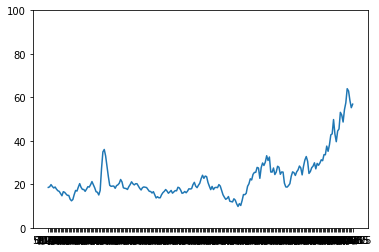

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv(r'C:\Users\Paul\Documents\Spring 2019 Stuff\EconBigData&Forecasting\FinalProject\Oil.csv')
plt.ylim([0,100])
plt.plot(dataset['DATE'], dataset['Brent'])

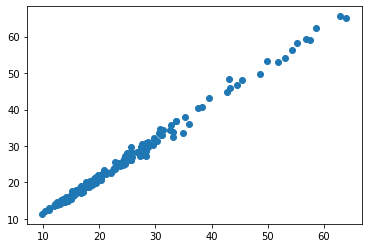

In [141]:
plt.scatter(dataset['Brent'], dataset['WTI'])

In [142]:
import numpy as np
import math
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
print("done")

done


In [143]:
Brent = dataset['Brent']
WTI = dataset['WTI']

In [144]:
Brent = np.array(Brent)
print(Brent)
len(Brent)

[18.58 18.86 19.86 18.98 18.31 18.76 17.78 17.05 16.75 15.73 14.73 16.6
 16.31 15.54 14.91 14.89 13.18 12.41 13.02 15.31 17.17 16.89 18.7  20.32
 18.63 17.67 17.62 16.77 17.77 18.91 18.73 19.84 21.25 19.81 18.39 16.61
 16.35 15.1  17.17 27.17 34.9  36.02 33.07 28.27 23.57 19.54 19.08 19.18
 19.19 18.17 19.4  19.77 20.5  22.21 21.11 18.41 18.16 18.05 17.63 18.92
 19.89 21.16 20.24 19.74 20.27 20.26 19.21 18.14 17.39 18.47 18.79 18.67
 18.51 17.65 16.78 16.7  16.01 16.61 15.2  13.73 14.29 13.8  13.82 15.23
 16.19 16.76 17.6  16.89 15.9  16.49 17.19 15.93 16.55 17.11 17.01 18.65
 18.35 17.31 15.85 16.1  16.7  16.11 16.86 17.93 17.85 18.   19.85 20.9
 19.15 18.46 19.57 20.51 22.63 24.16 22.76 23.78 23.54 20.85 19.13 17.56
 19.02 17.58 18.46 18.6  18.46 19.87 19.17 17.18 15.19 14.07 13.1  13.53
 14.36 12.21 12.08 11.91 13.34 12.7  11.04  9.82 11.11 10.27 12.51 15.29
 15.23 15.86 19.08 20.22 22.54 22.   24.58 25.47 25.51 27.78 27.49 22.76
 27.74 29.8  28.68 30.2  33.14 30.96 32.55 25.66 25.6

224

In [145]:
Brent = Brent.astype('float32')


#normalize the dataset
#scaler = MinMaxScaler(feature_range=(-1, 1))
#dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(210)
test_size = len(Brent) - train_size
train = Brent[145:train_size]
test = Brent[train_size:len(dataset)] 
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

65 14


In [146]:
# reshape into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [147]:
#from keras.preprocessing.sequence import TimeseriesGenerator
#gen = TimeseriesGenerator(trainY, trainY, length = 3)

In [148]:
#for i in range(len(gen)):
#    if i==0:
#        x = gen[i]
#    if i==1:
#        y = gen[i]
#    print(x)
#m = numpy.concatenate((x, y))

In [149]:
#print(len(x[0]), len(y[0]))

In [150]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [151]:
x = rolling_window(trainY, look_back)

In [152]:
len(x)

53

In [153]:
trainX = trainX[0:len(x)]
len(trainX)

53

In [154]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape[1]

1

In [155]:
model = Sequential()
model.add(LSTM(6, recurrent_activation='linear', input_shape=(1, look_back)))
model.add(Dense(look_back))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, x, epochs=250, batch_size=1, verbose=2)

Epoch 1/250
 - 8s - loss: 860.0320
Epoch 2/250
 - 0s - loss: 544.3495
Epoch 3/250
 - 0s - loss: 253.3970
Epoch 4/250
 - 0s - loss: 85.8456
Epoch 5/250
 - 0s - loss: 33.3473
Epoch 6/250
 - 0s - loss: 22.4400
Epoch 7/250
 - 0s - loss: 20.1515
Epoch 8/250
 - 0s - loss: 20.3151
Epoch 9/250
 - 0s - loss: 19.5698
Epoch 10/250
 - 0s - loss: 19.3838
Epoch 11/250
 - 1s - loss: 19.3564
Epoch 12/250
 - 0s - loss: 19.1728
Epoch 13/250
 - 0s - loss: 19.5041
Epoch 14/250
 - 0s - loss: 19.2433
Epoch 15/250
 - 0s - loss: 19.2922
Epoch 16/250
 - 0s - loss: 19.1167
Epoch 17/250
 - 0s - loss: 18.9594
Epoch 18/250
 - 0s - loss: 18.7348
Epoch 19/250
 - 0s - loss: 19.2219
Epoch 20/250
 - 0s - loss: 19.1092
Epoch 21/250
 - 0s - loss: 19.0494
Epoch 22/250
 - 0s - loss: 18.5814
Epoch 23/250
 - 0s - loss: 19.2488
Epoch 24/250
 - 0s - loss: 18.7426
Epoch 25/250
 - 0s - loss: 18.4710
Epoch 26/250
 - 0s - loss: 18.9743
Epoch 27/250
 - 0s - loss: 18.3646
Epoch 28/250
 - 0s - loss: 18.7767
Epoch 29/250
 - 0s - loss:

In [156]:
testPredict = model.predict(testX)
# shift train predictions for plotting
#testX1, testY1 = create_dataset(test, look_back)
#TestMSE = math.sqrt(mean_squared_error(testPredict, testY1))
#print(TestMSE)
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#look_back = 0
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
#testPredictPlot = numpy.empty_like(dataset)
#testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(trainPredictPlot)
#plt.plot(trainY1)
#plt.show()

In [157]:
testPredict

array([[49.854103, 50.181664, 50.52774 , 49.587906, 51.38064 , 50.386784],
       [47.238956, 47.52643 , 47.641525, 48.837067, 48.81179 , 50.460674],
       [51.598686, 51.174522, 50.95926 , 52.1962  , 50.929012, 54.43175 ],
       [55.279152, 53.22223 , 54.40212 , 54.870895, 53.06885 , 57.41035 ],
       [58.400185, 59.312225, 58.565567, 58.801548, 60.184406, 60.017673],
       [59.72074 , 60.35305 , 60.6391  , 60.22604 , 62.401703, 61.188328],
       [56.92271 , 56.999733, 57.5986  , 59.106895, 59.124256, 61.04783 ]],
      dtype=float32)

In [158]:
testY

array([48.65, 54.35, 57.52, 63.98, 62.91, 58.54, 55.24], dtype=float32)

In [159]:
for i in range(len(testY)-5):
    a = testPredict[i]
    m = a- testY[i:len(testY)-1+i]
    print(m)
    print(np.mean(m))
    k = math.sqrt(mean_squared_error(a, testY[i:len(testY)-1+i]))
    print(k)
    print(i)


[  1.2041016  -4.168335   -6.99226   -14.392094  -11.529362   -8.153217 ]
-7.3385277
8.890538756584116
0
[ -7.111042   -9.993572  -16.338474  -14.072933   -9.72821    -4.7793274]
-10.33726
11.052237195314095
1


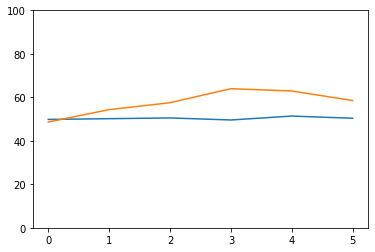

In [160]:
plt.ylim([0,100])
plt.plot(testPredict[0])
plt.plot(testY[0:6])

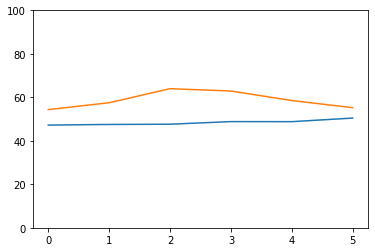

In [161]:
plt.ylim([0,100])
plt.plot(testPredict[1])
plt.plot(testY[1:7])

In [130]:
WTI = np.array(WTI)
WTI = WTI.astype('float32')


#normalize the dataset
#scaler = MinMaxScaler(feature_range=(-1, 1))
#dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(210)
test_size = len(WTI) - train_size
train = WTI[145:train_size]
test = WTI[train_size:len(dataset)] 
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

65 14


In [131]:
look_back = 1
WTItrainX, WTItrainY = create_dataset(train, look_back)
WTItestX, WTItestY = create_dataset(test, look_back)
WTItrainX = WTItrainX.T

In [132]:
#WTItrainX = np.column_stack((WTItrainX, trainX))
#WTItrainY = np.column_stack((WTItrainY, trainY))
#WTItestX = np.column_stack((WTItestX, testX))
#WTItestY = np.column_stack((WTItestY, testY))

In [133]:
#WTItrainX

In [134]:
#WTItrainX = np.reshape(WTItrainX, (WTItrainX.shape[0], 1, WTItrainX.shape[1]))
#WTItestX = np.reshape(WTItestX, (WTItestX.shape[0], 1, WTItestX.shape[1]))
#WTItrainX.shape[1]

In [135]:
model = Sequential()
model.add(LSTM(6, recurrent_activation='linear', input_shape=(1, look_back)))
model.add(Dense(look_back))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(WTItrainX, WTItrainY, epochs=100, batch_size=1, verbose=2)

ValueError: Error when checking input: expected lstm_6_input to have 3 dimensions, but got array with shape (1, 63)

In [ ]:
trainPredict = np.reshape(trainPredict, (trainPredict.shape[0], 1, trainPredict.shape[1]))